In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical


In [2]:
# 1. Cargar y Preparar los Datos
def leer_datos(ruta):
    df = pd.read_csv(ruta, sep=',')
    return df

In [3]:
# Cargar los datos
data = leer_datos("data_evaluacion.csv")


In [4]:
# Verificar si hay valores nulos en las columnas numéricas
numeric_columns = data.select_dtypes(include=[np.number]).columns
categorical_columns = data.select_dtypes(exclude=[np.number]).columns


In [5]:
print("Valores nulos en las columnas numéricas:")
print(data[numeric_columns].isnull().sum())

print("Valores nulos en las columnas categóricas:")
print(data[categorical_columns].isnull().sum())


Valores nulos en las columnas numéricas:
39       0
77516    0
13       0
2174     0
0        0
40       0
dtype: int64
Valores nulos en las columnas categóricas:
State-gov        0
Bachelors        0
Never-married    0
Adm-clerical     0
Not-in-family    0
White            0
Male             0
United-States    0
<=50K            0
dtype: int64


In [6]:
# Renombrar las columnas del DataFrame
data.rename(columns={
    '39': 'Age',
    '77516': 'HoursPerWeek',
    '13': 'EducationLevel',
    '2174': 'PostalCode',
    '0': 'Indicator',
    '40': 'MaxHours',
    '<=50K': 'salary'
}, inplace=True)


In [7]:
# Verificar el renombramiento de las columnas
print("Columnas renombradas:")
print(data.head(10))

Columnas renombradas:
   Age         State-gov  HoursPerWeek     Bachelors  EducationLevel  \
0   50  Self-emp-not-inc         83311     Bachelors              13   
1   38           Private        215646       HS-grad               9   
2   53           Private        234721          11th               7   
3   28           Private        338409     Bachelors              13   
4   37           Private        284582       Masters              14   
5   49           Private        160187           9th               5   
6   52  Self-emp-not-inc        209642       HS-grad               9   
7   31           Private         45781       Masters              14   
8   42           Private        159449     Bachelors              13   
9   37           Private        280464  Some-college              10   

           Never-married       Adm-clerical  Not-in-family  White    Male  \
0     Married-civ-spouse    Exec-managerial        Husband  White    Male   
1               Divorced  Handl

In [8]:
# Cambiar el nombre de la columna
data.rename(columns={'<=50K': 'salary'}, inplace=True)

# Mostrar las primeras filas del DataFrame para verificar el cambio
print(data.head())

   Age         State-gov  HoursPerWeek  Bachelors  EducationLevel  \
0   50  Self-emp-not-inc         83311  Bachelors              13   
1   38           Private        215646    HS-grad               9   
2   53           Private        234721       11th               7   
3   28           Private        338409  Bachelors              13   
4   37           Private        284582    Masters              14   

        Never-married       Adm-clerical  Not-in-family  White    Male  \
0  Married-civ-spouse    Exec-managerial        Husband  White    Male   
1            Divorced  Handlers-cleaners  Not-in-family  White    Male   
2  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
3  Married-civ-spouse     Prof-specialty           Wife  Black  Female   
4  Married-civ-spouse    Exec-managerial           Wife  White  Female   

   PostalCode  Indicator  MaxHours  United-States salary  
0           0          0        13  United-States  <=50K  
1           0         

In [9]:
# Actualizar las columnas categóricas después de renombrar
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

In [10]:
# 2. Codificar Columnas Categóricas
categorical_columns = data.select_dtypes(exclude=[np.number]).columns

In [11]:
# Codificar columnas categóricas
le = LabelEncoder()
for col in categorical_columns:
    data[col] = le.fit_transform(data[col])

In [12]:
# Verificar las primeras filas después de la codificación
print(data.head())

   Age  State-gov  HoursPerWeek  Bachelors  EducationLevel  Never-married  \
0   50          6         83311          9              13              2   
1   38          4        215646         11               9              0   
2   53          4        234721          1               7              2   
3   28          4        338409          9              13              2   
4   37          4        284582         12              14              2   

   Adm-clerical  Not-in-family  White  Male  PostalCode  Indicator  MaxHours  \
0             4              0      4     1           0          0        13   
1             6              1      4     1           0          0        40   
2             6              0      2     1           0          0        40   
3            10              5      2     0           0          0        40   
4             4              5      4     0           0          0        40   

   United-States  salary  
0             39       0  
1 

In [13]:
# 3. Normalización de Datos
# Normalización de los datos
scaler = StandardScaler()
numeric_columns = ['Age', 'HoursPerWeek', 'EducationLevel', 'PostalCode', 'Indicator', 'MaxHours']
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


In [14]:
# Mostrar las primeras 5 filas después de la normalización
print(data.head())


        Age  State-gov  HoursPerWeek  Bachelors  EducationLevel  \
0  0.828300          6     -1.007127          9        1.136539   
1 -0.046940          4      0.246012         11       -0.419313   
2  1.047111          4      0.426642          1       -1.197239   
3 -0.776308          4      1.408510          9        1.136539   
4 -0.119877          4      0.898798         12        1.525502   

   Never-married  Adm-clerical  Not-in-family  White  Male  PostalCode  \
0              2             4              0      4     1   -0.144799   
1              0             6              1      4     1   -0.144799   
2              2             6              0      2     1   -0.144799   
3              2            10              5      2     0   -0.144799   
4              2             4              5      4     0   -0.144799   

   Indicator  MaxHours  United-States  salary  
0  -0.217129 -2.213010             39       0  
1  -0.217129 -0.034087             39       0  
2  -0.21

In [15]:
# 4. Clustering con KMeans
# Aplicar KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data[numeric_columns])
labels = kmeans.labels_

c:\Users\Adali\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Añadir etiquetas de clúster a los datos originales
data['Cluster'] = labels


In [17]:

# Mostrar las primeras 5 filas después de agregar los clusters
print(data.head())

        Age  State-gov  HoursPerWeek  Bachelors  EducationLevel  \
0  0.828300          6     -1.007127          9        1.136539   
1 -0.046940          4      0.246012         11       -0.419313   
2  1.047111          4      0.426642          1       -1.197239   
3 -0.776308          4      1.408510          9        1.136539   
4 -0.119877          4      0.898798         12        1.525502   

   Never-married  Adm-clerical  Not-in-family  White  Male  PostalCode  \
0              2             4              0      4     1   -0.144799   
1              0             6              1      4     1   -0.144799   
2              2             6              0      2     1   -0.144799   
3              2            10              5      2     0   -0.144799   
4              2             4              5      4     0   -0.144799   

   Indicator  MaxHours  United-States  salary  Cluster  
0  -0.217129 -2.213010             39       0        1  
1  -0.217129 -0.034087             39 

In [18]:
# 5. Preparar Datos para la Red Neuronal Artificial
# Separar características y variable objetivo
X = data.drop(columns=['salary', 'Cluster'])
y = data['salary']

In [19]:

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
# Normalización de los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [21]:
# Convertir las etiquetas a una codificación one-hot
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
# 6. Crear y Entrenar el Modelo de Red Neuronal Artificial
modelo = Sequential()

# Primera capa oculta
modelo.add(Dense(32, activation='relu', input_shape=[X_train.shape[1]]))

# Segunda capa oculta
modelo.add(Dense(16, activation='relu'))

# Capa de salida
modelo.add(Dense(2, activation='softmax'))  # Cambiar a 2 para clasificación binaria

# Configuración del modelo
modelo.compile(
    loss='categorical_crossentropy',  # Para problemas multiclase
    optimizer='adam',
    metrics=['accuracy']
)

c:\Users\Adali\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
# Entrenamiento del modelo
historial = modelo.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)


Epoch 1/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8029 - loss: 0.3966
Epoch 2/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8429 - loss: 0.3312
Epoch 3/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.8505 - loss: 0.3223
Epoch 4/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8474 - loss: 0.3195
Epoch 5/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8489 - loss: 0.3193
Epoch 6/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8518 - loss: 0.3184
Epoch 7/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.8534 - loss: 0.3119
Epoch 8/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.8532 - loss: 0.3117
Epoch 9/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8501 - loss: 0.3166
Epoch 10/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8549 - loss: 0.3106
Epoch 11/50
3419/3419 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8541 - loss: 0.3098
Epoch 12/50
3419/34

In [24]:
# Evaluar el modelo
loss, accuracy = modelo.evaluate(X_test, y_test, verbose=1)
print(f'Accuracy: {accuracy}')

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8447 - loss: 0.3248
Accuracy: 0.8515662550926208


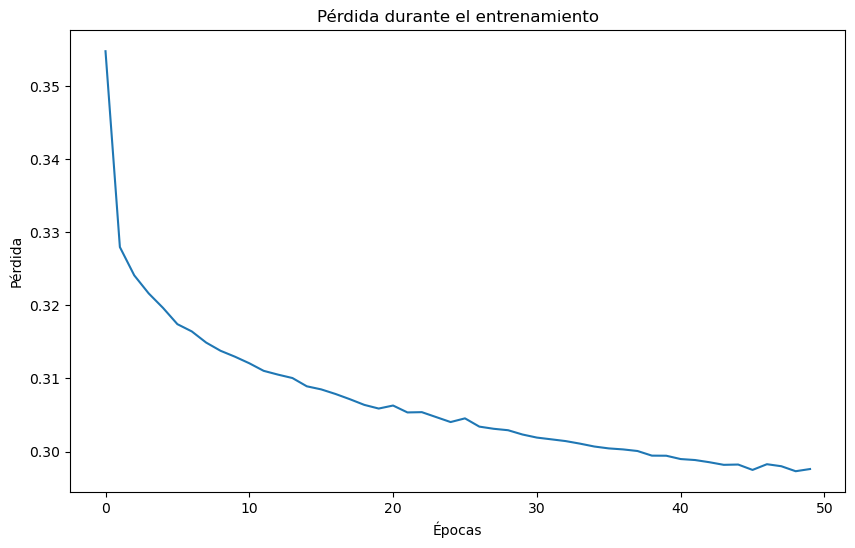

In [25]:
# Graficar la pérdida durante el entrenamiento
plt.figure(figsize=(10, 6))
plt.plot(historial.history['loss'])
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.title('Pérdida durante el entrenamiento')
plt.show()

In [26]:
# Realizar predicciones
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [27]:
# Convertir las etiquetas verdaderas a clases
y_test_classes = np.argmax(y_test, axis=1)

In [28]:
# Calcular y mostrar precisión
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f'Accuracy: {accuracy}')

Accuracy: 0.8515662321708866


In [29]:
# Matriz de confusión
cm = confusion_matrix(y_test_classes, y_pred_classes)
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
[[10447   719]
 [ 1456  2031]]


In [30]:
# Informe de clasificación
report = classification_report(y_test_classes, y_pred_classes)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91     11166
           1       0.74      0.58      0.65      3487

    accuracy                           0.85     14653
   macro avg       0.81      0.76      0.78     14653
weighted avg       0.84      0.85      0.85     14653



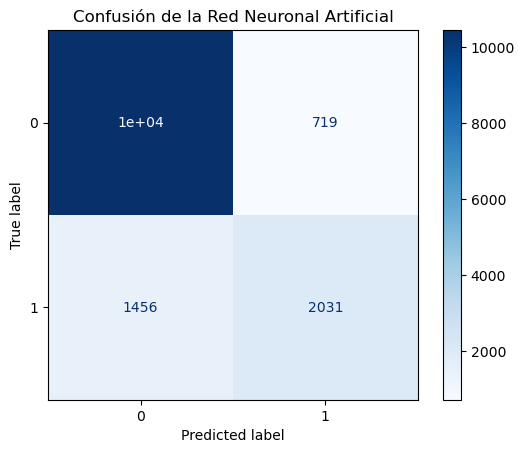

In [31]:
# Mostrar matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test_classes))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusión de la Red Neuronal Artificial')
plt.show()

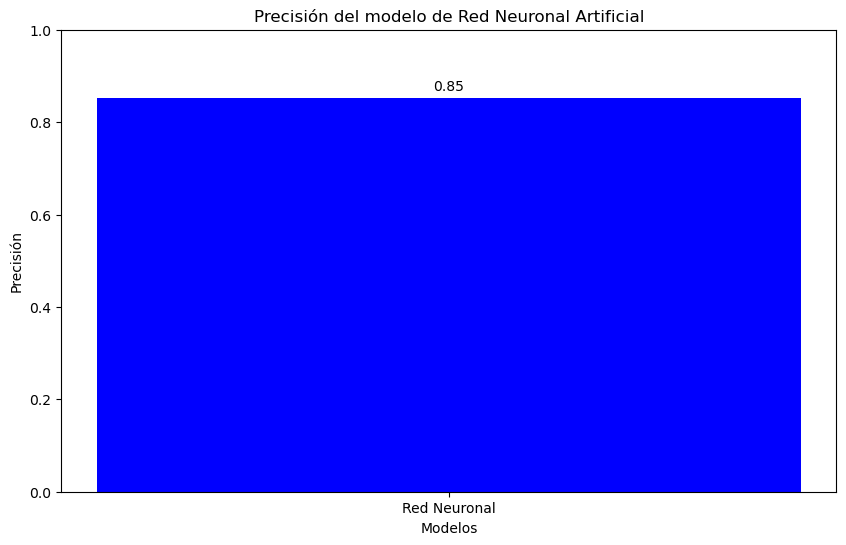

In [32]:
# Graficar los resultados de la Red Neuronal Artificial
plt.figure(figsize=(10, 6))
plt.bar(['Red Neuronal'], [accuracy], color='blue')
plt.xlabel('Modelos')
plt.ylabel('Precisión')
plt.title('Precisión del modelo de Red Neuronal Artificial')
plt.ylim([0, 1])
plt.text(0, accuracy + 0.01, f"{accuracy:.2f}", ha='center', va='bottom')
plt.show()

In [33]:
# Conclusiones para la Red Neuronal Artificial
print("Conclusiones Red Neuronal Artificial:")
print(f"El modelo de Red Neuronal Artificial tiene una precisión de {accuracy:.2f}")

Conclusiones Red Neuronal Artificial:
El modelo de Red Neuronal Artificial tiene una precisión de 0.85
